# Analysis of Titanic disaster dataset with EDA and ML

This is a portfolio example which showcases my python programming language skills through Exploratory Data Analysis (EDA) and Machine Learning (ML) model development.

The analysis of Titanic Disaster will be based on two datasets:

- Titanic Disaster train Dataset
- Titanic Disaster test Dataset

The data was retrieved from one of the Kaggle competitions (https://www.kaggle.com/competitions/titanic/overview) which aims to accurately predict the survival rate for each passenger in the test dataset based on the survival data provided in the train dataset.

I will start my analysis with Exploratory Data Analysis (EDA) on the Titanic Disaster train Dataset to better understand the characteristics of passengers who survived the disaster, and then proceed with the development of the Machine Learning (ML) model to predict the survival rates of passengers in the Titanic Disaster test Dataset.

The main libraries used for this analysis:
- **Numpy** and **Pandas** for the wrangling and manipulation of data
- **Matplotlib** and **Seaborn** for data visualization
- **Scikit-learn** for prediction model development

In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks") 
sns.set_palette("deep")

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## 1. Understanding of the Titanic disaster train and test datasets

In [2]:
# Reading in the data as pandas DataFrame
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [3]:
# First look at the Titanic disaster train dataset (5 first and last rows)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# First look at the Titanic disaster test dataset (5 first and last rows)
titanic_test 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


As a first step in the analysis, I will look at the types of attributes and check for the missing records in the two datasets with `.info()` and `.isnull()` methods

In [5]:
print(titanic_train.info())
print('\n')
print(titanic_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: in

Initial insights:
1. Titanic disaster train dataset has 891 records and 12 columns. 
2. Two columns `Age` and `Cabin` have a significant number of missing values (177 and 687 respectively) whereas the `Embarked` column is only short of 2 records. 
3. This dataset consists of numerical and categorical attributes, expressed in `int64`, `float64` and `object` data types.

In [6]:
print(titanic_test.info())
print('\n')
print(titanic_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Initial insights:
1. Titanic disaster test dataset has 418 records and 11 columns. 
2. Two columns `Age` and `Cabin` have a significant number of missing values (86 and 327 respectively) whereas `Fare` column is only short of 1 record. 
3. This dataset consists of numerical and categorical attributes, expressed in `int64`, `float64` and `object` data types.

Before I proceed to the Exploratory Data Analysis, I will review all attributes and decide which of them can be dropped for now. Here are my insights on the attributes in the Titanic disaster train and test datasets:

- **PassengerId** attribute: unique identifier number for each passenger, can be used as an `index` in both datasets.
- **Survived** attribute: the most important variable for the analysis (target variable) where `0` represents passengers who `died` and `1` who `survived` the disaster. (this is the attribute we will focus on predicting in the Titanic disaster test dataset).
- **Pclass** attribute: describes a ticket class/luxury level, can be interpreted as an economic status of a passenger.
- **Name** attribute: contains name, surname and title of each passenger. This will be used in further attribute/feature engineering.
- **Sex** attribute: provides information on the sex/gender of each passenger, a binary expression: Male, Female (can be transformed to 0, 1 for numerical calculations and/or model development).
- **Age** attribute: describes the age of each passenger. This attribute has a lot of missing values, therefore, this will be one of the hardest tasks in the cleaning part of the analysis.
- **SibSp** attribute: number of siblings/spouses aboard the Titanic
- **Parch** attribute: number of parents/children aboard the Titanic
- **Ticket** attribute: number of a ticket
- **Fare** attribute: provides information on the price of each ticket, can be interpreted as more descriptive of an economic status of a passenger than `Pclass`
- **Cabin** attribute: number of a cabin, has many missing values
- **Embarked** attribute: a port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

At this point, let's drop attributes which are not relevant for the upcoming analysis. `Cabin` attribute will be dropped due to the high level of missing values and lack of added value to further analysis. When it comes to the `Embarked` attribute, there seems to be very little correlation between the port of embarkation and the events that unfolded several days later, therefore I will drop this variable. Lastly, `Ticket` number does not seem to offer any added value as well.

In [7]:
# Droping irrelevant columns and setting PassengerId as an index for the train dataset
titanic_train.drop(['Cabin', 'Embarked', 'Ticket'], axis = 1, inplace = True)
titanic_train.set_index('PassengerId', inplace = True)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [8]:
# Droping irrelevant columns and setting PassengerId as an index for the test dataset
titanic_test.drop(['Cabin', 'Embarked', 'Ticket'], axis = 1, inplace = True)
titanic_test.set_index('PassengerId', inplace = True)
titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875


I will come back to the Titanic disaster test dataset in the last part of this analysis (before the development of the prediction model). At this point in time, let's turn attention to the Titanic disaster train dataset in order to better understand the existing categories of passengers in relation to the target variable (`Survived`).

## 2. Exploratory Data Analysis (EDA) [Titanic disaster train dataset]

I will begin this analysis with EDA where I will take a closer look at the various aspects of the data, such as location, variability and dispersion of certain attributes. As well, I will analyze different attributes in relation to the target variable, which will include grouping and visualization of the data.

In [9]:
# As a first step, let's look at summary statistics of all attributes with .describe() method
titanic_train.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000


In [10]:
# We can also group the data and count persentages
td_grouped = titanic_train.groupby(['Survived'])['Survived'].count()
td_grouped = pd.DataFrame(td_grouped).rename(columns={'Survived': 'Count'})
td_grouped['%'] = round(td_grouped / td_grouped['Count'].sum() * 100, 2)
td_grouped

,Count,%
Survived,,
0,549,61.62
1,342,38.38


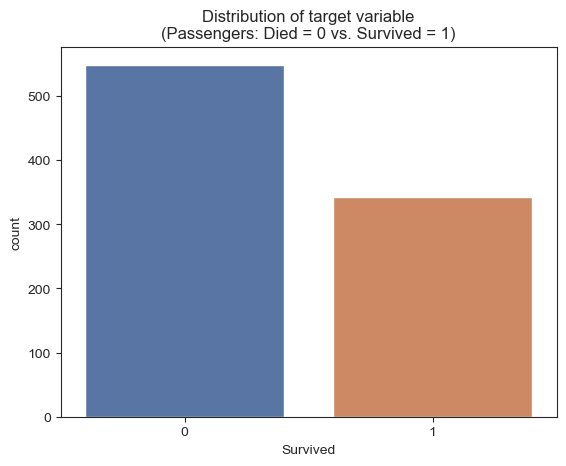

In [11]:
# Taking a closer look at the target variable (survival rate of all passengers)
sns.countplot(data= titanic_train, x='Survived').set(title = """Distribution of target variable
(Passengers: Died = 0 vs. Survived = 1)"""); 

In [12]:
# Grouping the data and counting persentages further
td_grouped2 = titanic_train.groupby(['Sex'])['Survived'].count()
td_grouped2 = pd.DataFrame(td_grouped2).rename(columns={'Survived': 'Count'})
td_grouped2['%'] = round(td_grouped2 / td_grouped2['Count'].sum() * 100, 2)
td_grouped2 = td_grouped2.sort_values(by=['%'], ascending=False)
td_grouped2

,Count,%
Sex,,
male,577,64.76
female,314,35.24


In [13]:
# Grouping the data and counting persentages further
td_grouped3 = titanic_train.groupby(['Pclass'])['Survived'].count()
td_grouped3 = pd.DataFrame(td_grouped3).rename(columns={'Survived': 'Count'})
td_grouped3['%'] = round(td_grouped3 / td_grouped3['Count'].sum() * 100, 2)
td_grouped3 = td_grouped3.sort_values(by=['%'], ascending=False)
td_grouped3

,Count,%
Pclass,,
3,491,55.11
1,216,24.24
2,184,20.65


In [14]:
# Grouping the data and counting persentages further
td_grouped4 = titanic_train.groupby(['Age'])['Survived'].count()
td_grouped4 = pd.DataFrame(td_grouped4).rename(columns={'Survived': 'Count'})
td_grouped4['%'] = round(td_grouped4 / td_grouped4['Count'].sum() * 100, 2)
td_grouped4 = td_grouped4.sort_values(by=['%'], ascending=False)
td_grouped4

,Count,%
Age,,
24.00,30,4.20
22.00,27,3.78
18.00,26,3.64
30.00,25,3.50
28.00,25,3.50
...,...,...
20.50,1,0.14
14.50,1,0.14
12.00,1,0.14


C:\Users\djoda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\djoda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


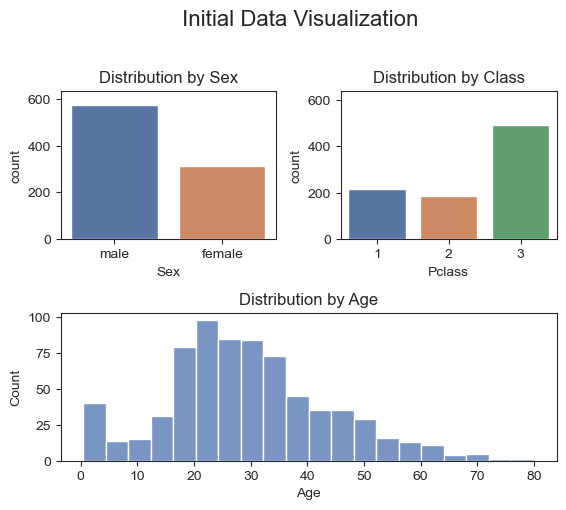

In [15]:
# Initial data visualization of Sex, Class and Age attributes

fig = plt.figure()
fig.subplots_adjust(wspace = 0.3, hspace = 0.5)
fig.suptitle('Initial Data Visualization', y = 1.05, fontsize=16)

ax1 = plt.subplot(212)
sns.histplot(x = 'Age', data = titanic_train) # Missing values in Age column will be addressed shortly
ax1.set_title('Distribution by Age')

ax2 = plt.subplot(221)
ax2.margins(x=0, y=0.1)
sns.countplot(titanic_train['Sex'], data = titanic_train)
ax2.set_title('Distribution by Sex')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=0.3)
sns.countplot(titanic_train['Pclass'], data = titanic_train)
ax3.set_title('Distribution by Class');

**First look** provides the initial understanding of the titanic disaster dataset and distribution of different attributes. As we can see, the split along gender/sex of the passengers is 65% male to 35% female. Majority of passengers are in the 3rd class cabins (55%) with 21% - 2nd class and 24% - 1st class. A brief note can be made on the age of passengers, where the vast majority of them are ranging from approx. 20 to 40 years of age.

### 2.1 Further analysis of `Sex` and `Pclass` attributes

In this part, I will further explore `Sex` and `Pclass` attributes in relation to the target variable (`Survived`)

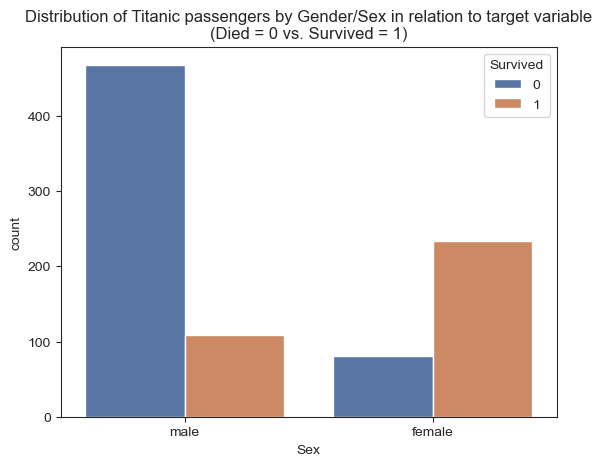

In [16]:
# Let's produce a bar plot of Sex and Survived attributes relationship
sns.countplot(data = titanic_train, x = "Sex", hue = "Survived").set(title = """Distribution of Titanic passengers by Gender/Sex in relation to target variable
(Died = 0 vs. Survived = 1)"""); 

In [17]:
# Let's count percentages
survived_sex = pd.crosstab(titanic_train['Survived'],titanic_train['Sex'],margins=True)
(survived_sex/survived_sex.loc['All']*100).round(2)

Sex,female,male,All
Survived,,,
0,25.8,81.11,61.62
1,74.2,18.89,38.38
All,100.0,100.00,100.00


We can see here that the majority of passengers who died during the Titanic disaster were Males, accounting for 81% of all passengers. On the contrary, female passengers clearly have higher chances of survival, accounting for 74% of passengers who survived.

Now, let's turn our attention to the `Pclass` attribute which identifies first class, second class and third class passengers.

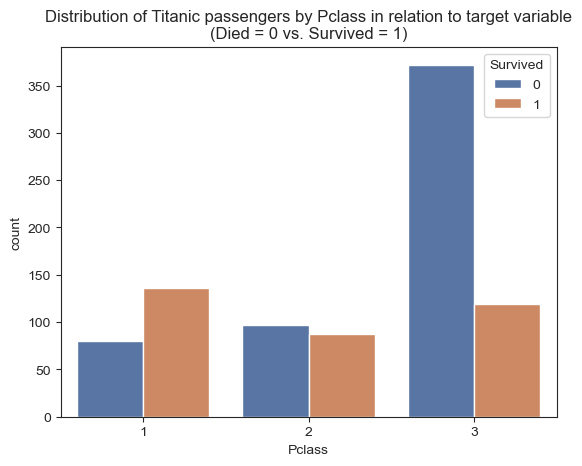

In [18]:
# Let's produce a bar plot of Pclass and Survived attributes relationship
sns.countplot(data = titanic_train, x = "Pclass", hue = "Survived").set(title = """Distribution of Titanic passengers by Pclass in relation to target variable
(Died = 0 vs. Survived = 1)"""); 

In [19]:
# Let's count percentages
survived_class = pd.crosstab(titanic_train['Survived'],titanic_train['Pclass'],margins=True)
(survived_class/survived_class.loc['All']*100).round(2)

Pclass,1,2,3,All
Survived,,,,
0,37.04,52.72,75.76,61.62
1,62.96,47.28,24.24,38.38
All,100.00,100.00,100.00,100.00


I can clearly see that the majority of First Class passengers survived during the Titanic disaster (63%). The chances of survival for the Second Class remain relatively high as the ration is almost 50/50. The worst chances of survival are for the Third Class passengers. Nearly 76% of all passengers of the Third Class died during the Titanic disaster.

In total, 38.38% of all passengers survived and 61.62% of all passengers died.

Let's turn our attention to looking at `Survived`, `Sex` and `Pclass` attributes together.

In [20]:
# Let's count percentages
survived_class_sex = pd.crosstab(index = titanic_train["Survived"], columns=[titanic_train["Pclass"], titanic_train["Sex"]], normalize='columns')*100
(survived_class_sex).round(2)

Pclass        1             2             3       
Sex      female   male female   male female   male
Survived                                          
0          3.19  63.11   7.89  84.26   50.0  86.46
1         96.81  36.89  92.11  15.74   50.0  13.54

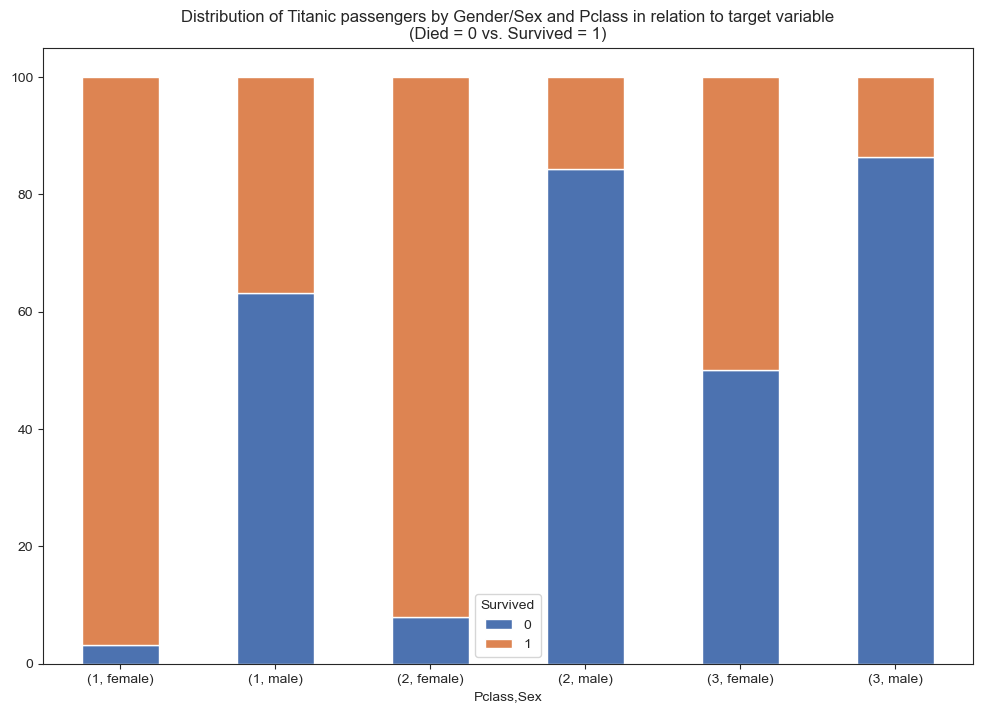

In [21]:
survived_class_sex.T.plot(kind='bar', stacked=True, rot=0, figsize=(12, 8)).set(title = """Distribution of Titanic passengers by Gender/Sex and Pclass in relation to target variable
(Died = 0 vs. Survived = 1)""");

This section provides a general picture on the categories of passengers who died and who survived during the Titanic disaster. As we can see from the analysis and data visualizations, 62% of all passengers died and only 38% survived. This section also revealed the following major trends:

1. 53% of all passengers who died during the Titanic disaster were Male;
2. 26% of all passengers who survived during the Titanic disaster were Female;
3. Passengers in the 3rd Class were more likely to die during the disaster, 42% of all passengers who died were 3rd Class passengers;
4. The biggest category of passengers who died were Males from 3rd Class, accounting for 34% of all passengers.

Finally, here is the list of passengers who were most likely to survive with percentages/ their chances of survival: 1st Class Female (96.81% chances to survive), 2nd Class Female (92.11%), 3rd Class Female (50.0%), 1st Class Male (36.89%), 2nd Class Male (15.74%), 3rd Class Male (13.54%).

### 2.2 Further analysis of `Age` attribute

Let's now turn our attention to the `Age` attribute, which has 177 missing values. The simplest way to deal with this is by calculating the mean or median of the non-missing values and then replacing the missing values with 'Age column mean or median. We could use the following code for this:

`titanic_data['Age_fill_with_mean'] = titanic_data['Age'].fillna(titanic_data['Age'].mean()).astype('int64')`

This, however, will not be an accurate measure of age for certain passengers, such as children, adolescents or senior passengers. A better approach for this is to impute the missing values based on the sets of related and similar variables. This means that here I have to calculate the mean or median values of passengers based on their, first of all, Sex and Class, but also, utilize the existing name titles. 

In [22]:
# Let's start with descriptive statistics for this column
print(titanic_train['Age'].describe())
print("\n")
print("Missing values in the Age column:", titanic_train['Age'].isnull().sum())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


Missing values in the Age column: 177


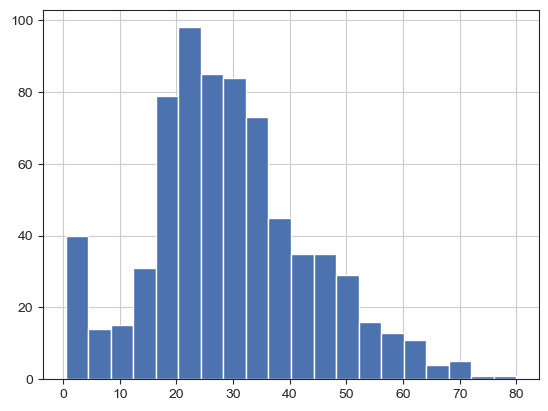

In [23]:
# Let's also take a look at the distribution of the Age data
titanic_train['Age'].hist(bins=20); 

In [24]:
# Let's also look at the mean and median values of Age attribute grouped by Sex and Class
age_dif = titanic_train.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median', 'count']).round(2)
age_dif

mean  median  count
Sex    Pclass                      
female 1       34.61    35.0     85
       2       28.72    28.0     74
       3       21.75    21.5    102
male   1       41.28    40.0    101
       2       30.74    30.0     99
       3       26.51    25.0    253

In [25]:
#Lastly, let's check different mean values based on the passengers' titles
print(titanic_train[titanic_train['Name'].str.contains('Master')]['Age'].agg(['mean','median', 'count']).round(2))
print(titanic_train[titanic_train['Name'].str.contains('Miss')]['Age'].agg(['mean','median', 'count']).round(2))
print(titanic_train[titanic_train['Name'].str.contains('Mr')]['Age'].agg(['mean','median', 'count']).round(2))

mean       4.57
median     3.50
count     36.00
Name: Age, dtype: float64
mean       21.77
median     21.00
count     146.00
Name: Age, dtype: float64
mean       33.12
median     31.00
count     511.00
Name: Age, dtype: float64


This allowed us to better understand the existing records in the `Age` column. As suggested by the minimum value, the youngest person onboard is a child with 0.42 age value and the oldest person is at the age of 80 (max value). The mean age value of all passengers on board sits around 30 with 75% of all passengers younger than 38. It is also clear that the age difference of passengers can be easily captured by the existing titles in the name column. This is a good way to impute more realistic values for 177 missing records.

#### Working with the missing values in the `Age` column

Having looked at the existing `Age` column/attribute values more closely, I can see here that the best approach forward is to impute the missing values by calculating the mean of the existing values in the `Age` column based on the titles of each passenger. For example, if the name of the person contains `Master` we can safely assume that this is male child. We can derive some logic based on the title of the passenger in the `Name` column, such as `Miss`, `Mrs`, `Master`, `Mr`. This might help us to break the missing values into smaller groups and then calculate mean or median for these groups. We can see from the dataframe above that it seems that the name of all passengers contained a title.

This will make the age value for each passenger more accurate and closer to a realistic situation on an individual level. Therefore, as a first step I will extract the title of each passenger from the `Name` column and create a new column called `Title`.

In [26]:
# Extracting title values and creating Title column/attribute
titanic_train['Title'] = titanic_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [27]:
# Let's calculate the mean and median values based on the titles of passengers
titles = titanic_train.groupby(['Title', 'Sex', 'Pclass'])['Age'].agg(['mean', 'median', 'count'])
titles

mean  median  count
Title    Sex    Pclass                          
Capt     male   1       70.000000    70.0      1
Col      male   1       58.000000    58.0      2
Countess female 1       33.000000    33.0      1
Don      male   1       40.000000    40.0      1
Dr       female 1       49.000000    49.0      1
         male   1       42.000000    44.0      3
                2       38.500000    38.5      2
Jonkheer male   1       38.000000    38.0      1
Lady     female 1       48.000000    48.0      1
Major    male   1       48.500000    48.5      2
Master   male   1        5.306667     4.0      3
                2        2.258889     1.0      9
                3        5.350833     4.0     24
Miss     female 1       30.000000    30.0     45
                2       22.390625    24.0     32
                3       16.123188    18.0     69
Mlle     female 1       24.000000    24.0      2
Mme      female 1       24.000000    24.0      1
Mr       male   1       41.580460    40.0     87
                2       32.768293    31.0     82
                3       28.724891    26.0    229
Mrs      female 1       40.882353    41.5     34
                2       33.682927    32.0     41
                3       33.515152    31.0     33
Ms       female 2       28.000000    28.0      1
Rev      male   2       43.166667    46.5      6
Sir      male   1       49.000000    49.0      1

As we can see here the age mean/median values differ based on their title, sex and class, however, the list of titles seems to be very long and we could reduce the list by grouping titles with similar mean or median value.

In [28]:
# Replacing all titles with mr, mrs, miss, master
def update_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Sir', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [29]:
# Update values in the Title column
titanic_train['Title']=titanic_train.apply(update_titles, axis=1)
titanic_train['Title'].value_counts()

Mr        531
Miss      185
Mrs       135
Master     40
Name: Title, dtype: int64

In [30]:
# Let's look at the mean and median values based on the updated titles of passengers
titles2 = titanic_train.groupby(['Title', 'Sex', 'Pclass'])['Age'].agg(['mean', 'median','count'])
titles2

mean  median  count
Title  Sex    Pclass                          
Master male   1        5.306667     4.0      3
              2        2.258889     1.0      9
              3        5.350833     4.0     24
Miss   female 1       29.744681    30.0     47
              2       22.560606    24.0     33
              3       16.123188    18.0     69
Mr     male   1       42.394737    42.0     95
              2       33.477273    31.0     88
              3       28.724891    26.0    229
Mrs    female 1       40.631579    41.5     38
              2       33.682927    32.0     41
              3       33.515152    31.0     33
       male   1       42.000000    44.0      3
              2       38.500000    38.5      2

Since we know that the Age data is not normally distributed, we will use **median** instead of **mean**. The code below will group all passengers into groups based on the `Title` and then replace the missing values in the column `Age` with median age value for that particular group:

In [31]:
# Let's impute the missing values
titanic_train.loc[titanic_train['Age'].isnull(),'Age'] = titanic_train.groupby('Title').Age.transform('median').round(1)

In [32]:
# Let's get summary statistics
titanic_train['Age'].describe()

count    891.000000
mean      29.377295
std       13.254246
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

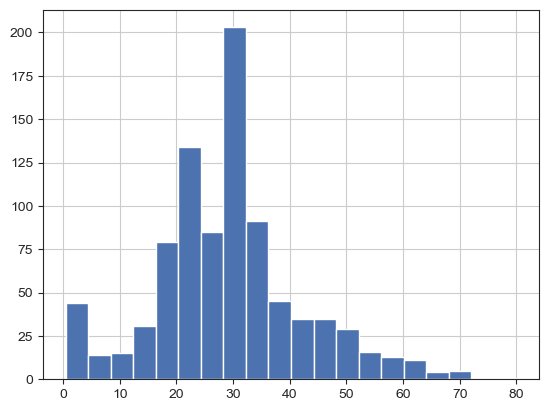

In [33]:
# Plotting distribution of data in the Age column
titanic_train['Age'].hist(bins=20); 

In [ ]:
#titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1

In [ ]:
#family = titanic_train.groupby('FamilySize')['Survived'].agg(['sum', 'mean']).reset_index()
#family

In [ ]:
#family.plot(x='FamilySize', y='mean', kind='bar', legend=False, color = 'b', 
#                          rot=0, figsize=(12, 7), title = 'Survival by family size');

In [ ]:
#titanic_train.drop(['FamilySize'], axis = 1, inplace = True)

### 2.3 Checking for outliers

Before I proceed with the prediction model development, let's look at the outliers in the data and deal with them if any is found.

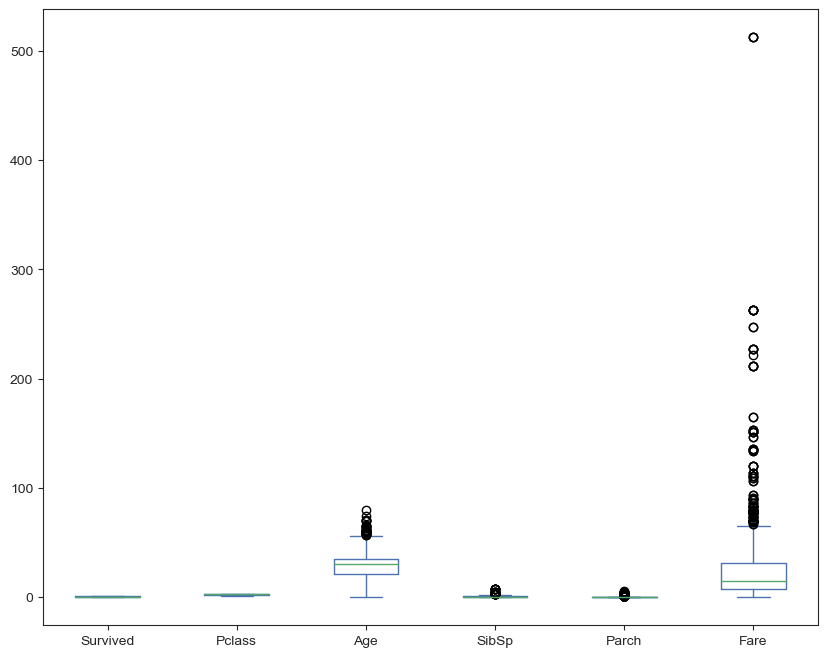

In [34]:
# Plotting boxplot to identfiy existing outliers
titanic_train.plot(kind='box', figsize= (10,8));

As we can see from the figure, there are outliers in Age, SibSp, Parch and Fare columns. 

In [35]:
# Let's revisit summary statistics of the dataset.
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.377295,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.254246,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


`clip()` method will be used to deal with outliers in `Age`, `SibSp`, `Parch`, `Fare` columns. 

In [36]:
# Removing outliers in the data
titanic_train[['Age', 'SibSp', 'Parch', 'Fare']]= titanic_train[['Age', 'SibSp', 'Parch', 'Fare']].clip(lower = titanic_train[['Age', 'SibSp', 'Parch', 'Fare']].quantile(0.15),
                                                                                                        upper= titanic_train[['Age', 'SibSp', 'Parch', 'Fare']].quantile(0.85), axis=1)

C:\Users\djoda\AppData\Local\Temp\ipykernel_23564\2207793395.py:2: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  titanic_train[['Age', 'SibSp', 'Parch', 'Fare']]= titanic_train[['Age', 'SibSp', 'Parch', 'Fare']].clip(lower = titanic_train[['Age', 'SibSp', 'Parch', 'Fare']].quantile(0.15),


`Parch` attribute will be removed because more than 75% of all data are value with 0.

In [37]:
titanic_train['Parch'].value_counts()

0    678
1    213
Name: Parch, dtype: int64

In [38]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.042088,0.317621,0.239057,22.993485
std,0.486592,0.836071,8.283778,0.465813,0.426747,17.867568
min,0.000000,1.000000,18.000000,0.000000,0.000000,7.750000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,42.000000,1.000000,1.000000,56.495800


In [39]:
# Droping `Parch` attribute
titanic_train.drop(['Parch'], axis = 1, inplace = True)

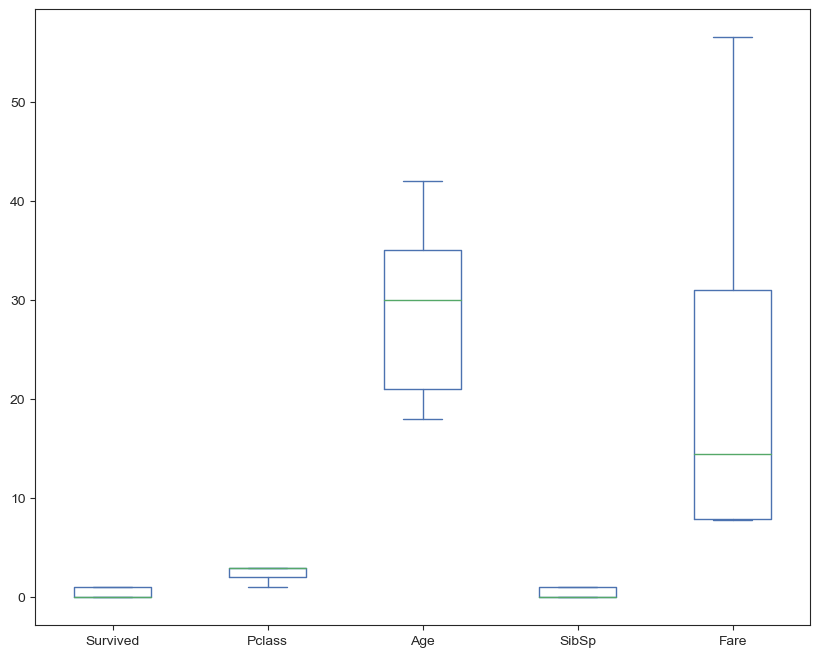

In [40]:
# Checking for outliers with boxplot again
titanic_train.plot(kind='box', figsize= (10,8)) ;

## 3. Prediction: Machine Learning (ML) model development

For this classification problem, I am going to use the Logistic Regression classification model due to the fact that the target `Survived` variable is a binary variable where 0 indicates passengers who `died` and 1 - `survived`.

### 3.1 Cleaning Titanic disaster test dataset

In [41]:
# Applying the same methods as described earlier with Titanic disaster train dataset
titanic_test['Title'] = titanic_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_test['Title']=titanic_test.apply(update_titles, axis=1)
titanic_test.loc[titanic_test['Age'].isnull(),'Age'] = titanic_test.groupby('Title').Age.transform('median').round(1)
titanic_test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,Mrs
...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,29.0,0,0,8.0500,Mr
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,Dona
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,Mr


In [42]:
# There is 1 missing record in the Fare column, let's impute with mean value
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].mean()).astype('int64')

In [43]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Name    418 non-null    object 
 2   Sex     418 non-null    object 
 3   Age     418 non-null    float64
 4   SibSp   418 non-null    int64  
 5   Parch   418 non-null    int64  
 6   Fare    418 non-null    int64  
 7   Title   418 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 45.6+ KB


### 3.2 Model development

In [44]:
# Droping unnecessary columns for the model development
titanic_train.drop(columns=['Name', 'Title'], axis=1, inplace=True)
titanic_test.drop(columns=['Name','Parch', 'Title'], axis=1, inplace=True)

In [45]:
# Creating dummies for Sex and Class attributes
titanic_train= pd.get_dummies(titanic_train, columns=['Pclass', 'Sex'], drop_first= True)
titanic_test= pd.get_dummies(titanic_test, columns=['Pclass', 'Sex'], drop_first= True)

In [46]:
# Let's take a look at the current dataset
titanic_train

,Survived,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male
PassengerId,,,,,,,
1,0,22.0,1,7.7500,0,1,1
2,1,38.0,1,56.4958,0,0,0
3,1,26.0,0,7.9250,0,1,0
4,1,35.0,1,53.1000,0,0,0
5,0,35.0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...
887,0,27.0,0,13.0000,1,0,1
888,1,19.0,0,30.0000,0,0,0
889,0,21.0,1,23.4500,0,1,0


In [47]:
# Spliting the data into suitable format for ML model development

X_train= titanic_train.iloc[:, 1:]
y_train= titanic_train['Survived'].values.reshape(-1,1)

X_test= titanic_test

In [48]:
# Applting StandardScaler to preprocess the data for model development

scaler = StandardScaler()

X_train[['Age', 'SibSp', 'Fare']]= scaler.fit_transform(X_train[['Age', 'SibSp', 'Fare']])
X_test[['Age', 'SibSp', 'Fare']]= scaler.fit_transform(X_test[['Age', 'SibSp', 'Fare']])

In [49]:
# Applying Machine Learning model and gathering predictions
logreg = LogisticRegression()
logreg.fit(X_train, y_train.ravel())
predictions= logreg.predict(X_test)

In [50]:
predictions = pd.Series(predictions)
predictions.value_counts()

0    266
1    152
dtype: int64

In [51]:
print(logreg.score(X_train, y_train))

0.7867564534231201


## 4. Summary of findings // Final remarks

Based on the Exploratory Data Analysis, it is clear that 1st class Females had the best chances to survive. Here is the list of the categories of passengers with their chances of survival based on the Titanic Disaster train Dataset:

- 1st Class Female (96.81% chances to survive)
- 2nd Class Female (92.11%)
- 3rd Class Female (50.0%)
- 1st Class Male (36.89%)
- 2nd Class Male (15.74%)
- 3rd Class Male (13.54%)

The `Age` attribute was the hardest one to deal with in this analysis, the column had a lot of missing values and I had to find a clever way to deal with them due to the fact that the age of a passenger could play a very important part for survival. This is also an important attribute when developing a Machine Learning model, therefore, the imputation of the missing values had to be as accurate as possible, which led to higher model prediction score.

In this analysis, I have dropped the following attributes: `Cabin`, `Ticket`, `Embarked`. The `Cabin` attribute was dropped due to the high level of missing values and lack of the added value for the analysis. When it comes to the `Embarked` attribute, there was very little correlation between the port of embarkation and the events that unfolded several days later, therefore, it was dropped. Lastly, unique identifier of a `Ticket` number does not seem to offer any added value as well.

For this classification problem, I have used the Logistic Regression classification model. This seemed to be the most appropriate ML model to be used due to the fact that the target `Survived` variable was a binary variable where 0 indicated passengers that died and 1 that survived.

This model achieved an accuracy score of 0.79. There is room for improvement here, however, this requires advanced feature engineering and testing of other ML models.